In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import os
from PIL import Image
print(os.listdir("./common/data"))

import tensorflow as tf
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
tf.compat.v1.keras.backend.set_session(tf.compat.v1.Session(config=config))

# Keras Libraries
import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator, load_img
from sklearn.metrics import classification_report, confusion_matrix
%matplotlib inline

['chest_xray', 'resampled', 'TEST']


Using TensorFlow backend.


# Resample Data Into New Dataset

# Resample Train Data

In [2]:
from common.src import resample as res

In [3]:
from imblearn.under_sampling import ClusterCentroids

path = r'C:\Users\mmitk\dev\2020\pneumonia\common\data\chest_xray\train'
cc = ClusterCentroids()

In [4]:
res.resample_directory(cc, path, 'ClustCent', val = False)

# Load Data

In [5]:
train_folder= './common/data/resampled/ClustCent/train'
val_folder = './common/data/chest_xray/val/'
test_folder = './common/data/chest_xray/test/'

In [6]:
# train 
os.listdir(train_folder)
train_n = train_folder+'NORMAL/'
train_p = train_folder+'PNEUMONIA/'

In [7]:
from common.src import util

train_datagen = util.create_train_datagen()
test_datagen = util.create_test_datagen()

training_set = util.create_generator_set(train_datagen, './common/data/resampled/ClustCent/train')
validation_generator = util.create_generator_set(test_datagen, './common/data/chest_xray/val/')
test_set = util.create_generator_set(test_datagen, './common/data/chest_xray/test/') 

Found 2682 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


# Create Model

In [8]:
from common.src import models

cnn20 = models.CNNModel(patience_s=19)
cnn20.create_model()
cnn20.summary()

# Fit Model

In [9]:
cnn_model = cnn20.fit_generator(training_set, validation_generator, epochs=20)

Epoch 1/20
163/163 [==============================] - 29s 178ms/step - loss: 0.4124 - tp: 4116.0000 - fp: 1037.0000 - tn: 4167.0000 - fn: 1088.0000 - accuracy: 0.7958 - precision: 0.7988 - recall: 0.7909 - auc: 0.8931 - val_loss: 0.4745 - val_tp: 228.0000 - val_fp: 76.0000 - val_tn: 228.0000 - val_fn: 76.0000 - val_accuracy: 0.7500 - val_precision: 0.7500 - val_recall: 0.7500 - val_auc: 0.8672
Epoch 2/20
163/163 [==============================] - 27s 165ms/step - loss: 0.2696 - tp: 4621.0000 - fp: 585.0000 - tn: 4619.0000 - fn: 583.0000 - accuracy: 0.8878 - precision: 0.8876 - recall: 0.8880 - auc: 0.9557 - val_loss: 0.3014 - val_tp: 266.0000 - val_fp: 38.0000 - val_tn: 266.0000 - val_fn: 38.0000 - val_accuracy: 0.8750 - val_precision: 0.8750 - val_recall: 0.8750 - val_auc: 0.9570
Epoch 3/20
163/163 [==============================] - 26s 162ms/step - loss: 0.2326 - tp: 4723.0000 - fp: 468.0000 - tn: 4736.0000 - fn: 481.0000 - accuracy: 0.9088 - precision: 0.9098 - recall: 0.9076 - auc:

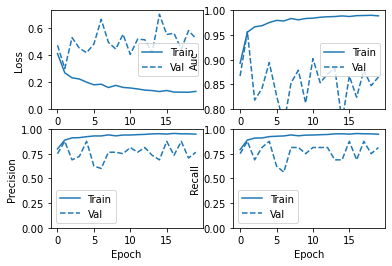

In [10]:
cnn20.plot_history()

In [11]:
cnn20.get_classification_report(test_set)

              precision    recall  f1-score   support

      NORMAL       0.33      0.20      0.25       234
   PNEUMONIA       0.61      0.76      0.68       390

    accuracy                           0.55       624
   macro avg       0.47      0.48      0.46       624
weighted avg       0.51      0.55      0.52       624



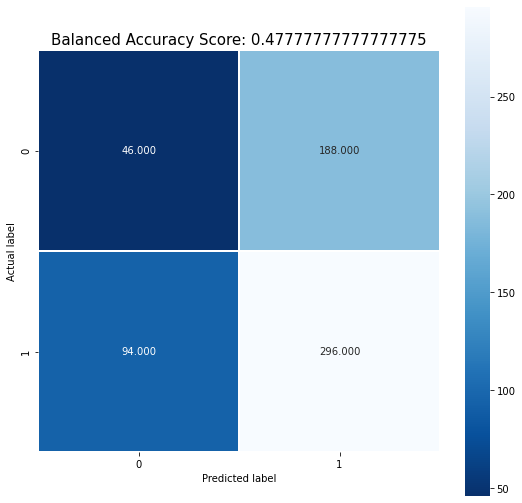

In [12]:
cnn20.display_confusion_matrix(test_set)